### Setting environment and dataset files
<a id='load_data'></a>

In [1]:
from os import environ
environ['train_device'] = 'cuda:1' # training device: 'cpu' or 'cuda:X'
environ['store_device'] = 'cuda:1' # Data storing device:  'cpu' or 'cuda:X'

dataset_file_MC = '/data/lm4718/datasets/dataset_multicomp_fusion_train_val+batch375001-499939.pkl'
test_dataset_file_MC = '/data/kk4796/datasets/dataset_multicomp_fusion_test.pkl'
benchmark_dataset_file_MC ='/data/mm12191/datasets/benchmarks_ds2.json' 

# train_val_dataset_file_SC = '/data/kk4796/datasets/dataset_singlecomp_train_val.pkl'
# test_dataset_file_SC = '/data/kk4796/datasets/dataset_singlecomp_test.pkl'

train_val_dataset_file_SC = '/data/kk4796/datasets/dataset_singlecomp_13M115_train_val.pkl'
test_dataset_file_SC = '/data/kk4796/datasets/dataset_singlecomp_13M115_test.pkl'


%run utils_k-best.py # imports and defines some utils functions

### Load Data
<a id='load_data'></a>

In [4]:
#Loading the test dataset
test_dataset, test_bl, test_indices, _, _ = load_merge_data(test_dataset_file_MC, test_dataset_file_SC, 1, filter_func_MC=filter_schedule_MC, filter_func_SC=filter_schedule_SC)

100%|██████████| 14607/14607 [00:19<00:00, 756.69it/s] 


Number of batches 22
Number of batches dropped due to too much memory accesses:642
Data loaded
Sizes: (22, 0) batches


In [4]:
#Loading the train/val dataset
train_val_dataset, val_bl, val_indices, train_bl, train_indices = load_merge_data(dataset_file_MC, train_val_dataset_file_SC, 0.2, max_batch_size=832, filter_func_MC=filter_schedule_MC, filter_func_SC=filter_schedule_SC)

100%|██████████| 131466/131466 [03:05<00:00, 707.38it/s] 


Number of batches 356
Number of batches dropped due to too much memory accesses:7448
Data loaded
Sizes: (71, 285) batches


In [5]:
#total batches number
len(train_val_dataset.X)

356

In [7]:
#batches sizes and tree structure
for i in range(len(test_dataset.X)):
    print(test_dataset.X[i][1].size(), get_tree_footprint(test_dataset.X[i][0]) )  
    #format of first output: batch size, number of computations, size of each comps vector

torch.Size([54, 2, 1272]) <BL0<BL1<BL2[CI0CI1]EL2>EL1>EL0>
torch.Size([28, 2, 1272]) <BL0<BL1<BL2[CI0]EL2><BL3[CI1]EL3>EL1>EL0>
torch.Size([4, 2, 1272]) <BL0<BL1<BL2<BL3[CI0]EL3><BL4[CI1]EL4>EL2>EL1>EL0>
torch.Size([83, 2, 1272]) <BL0<BL1[CI0CI1]EL1>EL0>
torch.Size([5, 2, 1272]) <BL0<BL1<BL2<BL3[CI0]EL3>EL2><BL4[CI1]EL4>EL1>EL0>
torch.Size([1, 2, 1272]) <BL0<BL1<BL2<BL3[CI0]EL3><BL4<BL5[CI1]EL5>EL4>EL2>EL1>EL0>
torch.Size([3, 2, 1272]) <BL0<BL1<BL2<BL3[CI0CI1]EL3>EL2>EL1>EL0>
torch.Size([7, 2, 1272]) <BL0<BL1<BL2[CI0]EL2><BL3<BL4[CI1]EL4>EL3>EL1>EL0>
torch.Size([1, 2, 1272]) <BL0<BL1<BL2<BL3<BL4[CI0CI1]EL4>EL3>EL2>EL1>EL0>
torch.Size([1, 2, 1272]) <BL0<BL1<BL2<BL3<BL4[CI0]EL4>EL3><BL5[CI1]EL5>EL2>EL1>EL0>
torch.Size([1, 2, 1272]) <BL0<BL1<BL2<BL3<BL4[CI0]EL4>EL3>EL2><BL5[CI1]EL5>EL1>EL0>
torch.Size([1, 2, 1272]) <BL0<BL1<BL2<BL3[CI0]EL3>EL2><BL4<BL5<BL6[CI1]EL6>EL5>EL4>EL1>EL0>
torch.Size([2048, 1, 1272]) <BL0<BL1<BL2[CI0]EL2>EL1>EL0>
torch.Size([2048, 1, 1272]) <BL0<BL1<BL2[CI0]EL2>EL

### Define Model

In [5]:
# %run utils_k-best.py

input_size = 1272

model = None 

model = Model_Recursive_LSTM_v2(input_size,comp_embed_layer_sizes=[600, 900, 600, 400, 200], drops=[0.275, 0.4, 0.275, 0.175, 0.175], output_size=106 * 5)

model.to(train_device) 

criterion = nn.CrossEntropyLoss()

optimizer = AdamW(model.parameters(),weight_decay=0.375e-2)  #0.375e-2
# optimizer = optim.RMSprop(model.parameters(), weight_decay=0.3e-2) # Other tested optimizer


### Train

Epoch 1/2000:  train Loss: 1322.7775   val Loss: 960.1473   time: 7.57s   best: 960.1473
Epoch 2/2000:  train Loss: 753.0821   val Loss: 821.7638   time: 3.20s   best: 821.7638
Epoch 3/2000:  train Loss: 679.9027   val Loss: 779.0272   time: 3.20s   best: 779.0272
Epoch 4/2000:  train Loss: 638.6730   val Loss: 696.6442   time: 3.22s   best: 696.6442
Epoch 5/2000:  train Loss: 608.2019   val Loss: 645.3721   time: 3.26s   best: 645.3721
Epoch 6/2000:  train Loss: 579.5869   val Loss: 617.8765   time: 3.22s   best: 617.8765
Epoch 7/2000:  train Loss: 556.8300   val Loss: 599.8071   time: 3.20s   best: 599.8071
Epoch 8/2000:  train Loss: 540.3982   val Loss: 573.3190   time: 3.22s   best: 573.3190
Epoch 9/2000:  train Loss: 522.6018   val Loss: 563.9882   time: 3.20s   best: 563.9882
Epoch 10/2000:  train Loss: 513.2949   val Loss: 548.7905   time: 3.21s   best: 548.7905
Epoch 11/2000:  train Loss: 501.3183   val Loss: 541.7233   time: 3.33s   best: 541.7233
Epoch 12/2000:  train Loss: 4

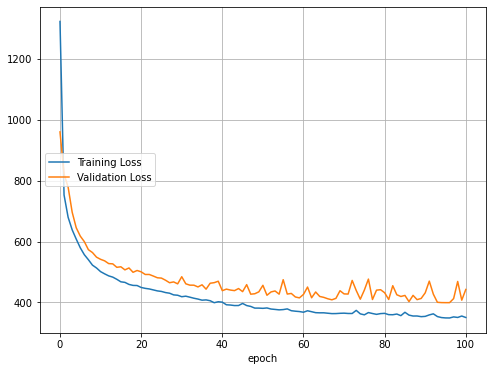

Epoch 102/2000:  train Loss: 350.0593   val Loss: 413.8966   time: 3.14s   best: 399.4482
Epoch 103/2000:  train Loss: 347.4743   val Loss: 401.6790   time: 3.16s   best: 399.4482
Epoch 104/2000:  train Loss: 346.4279   val Loss: 400.5598   time: 3.08s   best: 399.4482
Epoch 105/2000:  train Loss: 345.9710   val Loss: 413.1387   time: 3.07s   best: 399.4482
Epoch 106/2000:  train Loss: 344.1111   val Loss: 394.0479   time: 3.07s   best: 394.0479
Epoch 107/2000:  train Loss: 345.3883   val Loss: 394.5640   time: 3.06s   best: 394.0479
Epoch 108/2000:  train Loss: 341.8367   val Loss: 389.4060   time: 3.07s   best: 389.4060
Epoch 109/2000:  train Loss: 343.3317   val Loss: 412.1581   time: 3.07s   best: 389.4060
Epoch 110/2000:  train Loss: 342.5123   val Loss: 388.2998   time: 3.15s   best: 388.2998
Epoch 111/2000:  train Loss: 345.5206   val Loss: 389.1159   time: 3.14s   best: 388.2998
Epoch 112/2000:  train Loss: 340.7766   val Loss: 392.2703   time: 3.08s   best: 388.2998
Epoch 113/

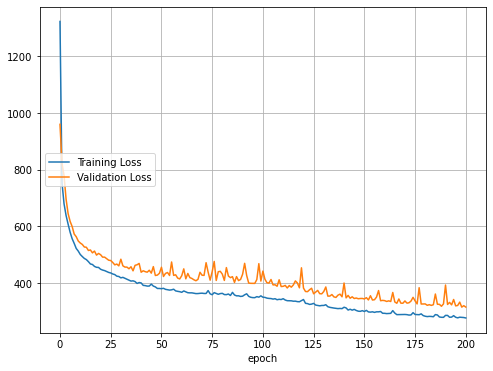

Epoch 202/2000:  train Loss: 276.0375   val Loss: 315.5157   time: 3.21s   best: 315.5157
Epoch 203/2000:  train Loss: 277.4270   val Loss: 317.3421   time: 3.27s   best: 315.5157
Epoch 204/2000:  train Loss: 275.3052   val Loss: 327.9568   time: 3.30s   best: 315.5157
Epoch 205/2000:  train Loss: 279.6721   val Loss: 368.7615   time: 3.29s   best: 315.5157
Epoch 206/2000:  train Loss: 286.1139   val Loss: 314.5051   time: 3.27s   best: 314.5051
Epoch 207/2000:  train Loss: 274.8598   val Loss: 318.4208   time: 3.33s   best: 314.5051
Epoch 208/2000:  train Loss: 274.6668   val Loss: 318.1782   time: 3.43s   best: 314.5051
Epoch 209/2000:  train Loss: 275.4463   val Loss: 318.6487   time: 3.33s   best: 314.5051
Epoch 210/2000:  train Loss: 277.1831   val Loss: 313.4042   time: 3.30s   best: 313.4042
Epoch 211/2000:  train Loss: 275.7210   val Loss: 316.4450   time: 3.31s   best: 313.4042
Epoch 212/2000:  train Loss: 274.4680   val Loss: 314.8847   time: 3.29s   best: 313.4042
Epoch 213/

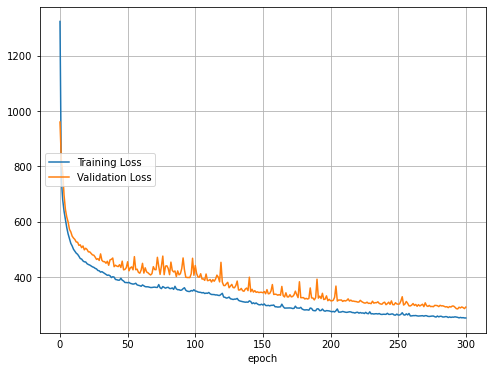

Epoch 302/2000:  train Loss: 253.7926   val Loss: 286.8022   time: 3.17s   best: 286.3254
Epoch 303/2000:  train Loss: 254.0462   val Loss: 293.9072   time: 3.09s   best: 286.3254
Epoch 304/2000:  train Loss: 254.4074   val Loss: 289.9066   time: 3.09s   best: 286.3254
Epoch 305/2000:  train Loss: 255.7671   val Loss: 290.3168   time: 3.09s   best: 286.3254
Epoch 306/2000:  train Loss: 254.9335   val Loss: 287.4360   time: 3.07s   best: 286.3254
Epoch 307/2000:  train Loss: 257.3693   val Loss: 289.1011   time: 3.09s   best: 286.3254
Epoch 308/2000:  train Loss: 251.8469   val Loss: 284.9237   time: 3.10s   best: 284.9237
Epoch 309/2000:  train Loss: 251.4562   val Loss: 287.3288   time: 3.18s   best: 284.9237
Epoch 310/2000:  train Loss: 256.3112   val Loss: 285.8454   time: 3.14s   best: 284.9237
Epoch 311/2000:  train Loss: 252.9315   val Loss: 288.1018   time: 3.10s   best: 284.9237
Epoch 312/2000:  train Loss: 252.2751   val Loss: 292.1394   time: 3.10s   best: 284.9237
Epoch 313/

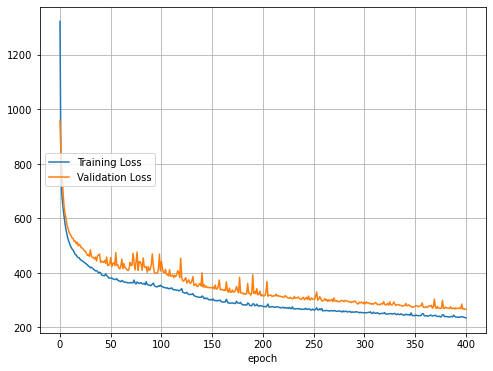

Epoch 402/2000:  train Loss: 238.5602   val Loss: 271.1968   time: 3.16s   best: 266.5483
Epoch 403/2000:  train Loss: 237.8092   val Loss: 271.3280   time: 3.16s   best: 266.5483
Epoch 404/2000:  train Loss: 236.5716   val Loss: 266.5886   time: 3.10s   best: 266.5483
Epoch 405/2000:  train Loss: 235.1886   val Loss: 267.4333   time: 3.10s   best: 266.5483
Epoch 406/2000:  train Loss: 236.1909   val Loss: 278.5315   time: 3.10s   best: 266.5483
Epoch 407/2000:  train Loss: 240.2236   val Loss: 298.0433   time: 3.09s   best: 266.5483
Epoch 408/2000:  train Loss: 240.2614   val Loss: 269.7773   time: 3.09s   best: 266.5483
Epoch 409/2000:  train Loss: 234.6314   val Loss: 265.5112   time: 3.10s   best: 265.5112
Epoch 410/2000:  train Loss: 234.0571   val Loss: 265.0030   time: 3.19s   best: 265.0030
Epoch 411/2000:  train Loss: 235.5683   val Loss: 266.0727   time: 3.13s   best: 265.0030
Epoch 412/2000:  train Loss: 239.5969   val Loss: 290.9946   time: 3.10s   best: 265.0030
Epoch 413/

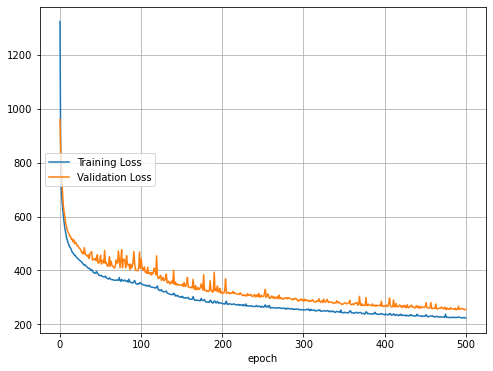

Epoch 502/2000:  train Loss: 224.8344   val Loss: 259.4284   time: 3.11s   best: 253.9567
Epoch 503/2000:  train Loss: 224.7444   val Loss: 256.9749   time: 3.20s   best: 253.9567
Epoch 504/2000:  train Loss: 223.2918   val Loss: 260.8860   time: 3.12s   best: 253.9567
Epoch 505/2000:  train Loss: 224.5438   val Loss: 259.9967   time: 3.10s   best: 253.9567
Epoch 506/2000:  train Loss: 223.4567   val Loss: 255.7958   time: 3.10s   best: 253.9567
Epoch 507/2000:  train Loss: 223.3801   val Loss: 254.3756   time: 3.09s   best: 253.9567
Epoch 508/2000:  train Loss: 223.6414   val Loss: 255.1764   time: 3.09s   best: 253.9567
Epoch 509/2000:  train Loss: 225.9394   val Loss: 269.2715   time: 3.09s   best: 253.9567
Epoch 510/2000:  train Loss: 225.5647   val Loss: 254.2455   time: 3.15s   best: 253.9567
Epoch 511/2000:  train Loss: 221.7409   val Loss: 256.5946   time: 3.17s   best: 253.9567
Epoch 512/2000:  train Loss: 222.1906   val Loss: 255.1378   time: 3.11s   best: 253.9567
Epoch 513/

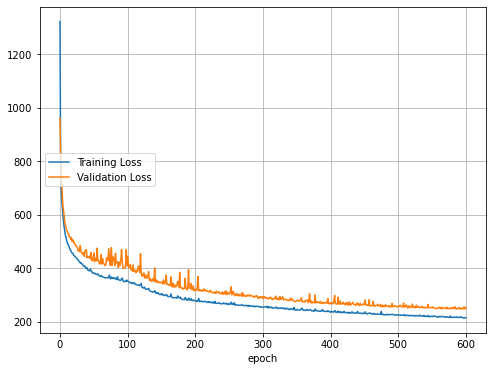

Epoch 602/2000:  train Loss: 215.3350   val Loss: 247.7343   time: 3.11s   best: 246.4761
Epoch 603/2000:  train Loss: 214.6416   val Loss: 245.9130   time: 3.20s   best: 245.9130
Epoch 604/2000:  train Loss: 215.3451   val Loss: 249.2397   time: 3.11s   best: 245.9130
Epoch 605/2000:  train Loss: 215.2132   val Loss: 251.7786   time: 3.10s   best: 245.9130
Epoch 606/2000:  train Loss: 213.3523   val Loss: 246.0812   time: 3.10s   best: 245.9130
Epoch 607/2000:  train Loss: 214.6208   val Loss: 249.9902   time: 3.09s   best: 245.9130
Epoch 608/2000:  train Loss: 214.1125   val Loss: 250.1298   time: 3.09s   best: 245.9130
Epoch 609/2000:  train Loss: 212.8188   val Loss: 248.1635   time: 3.09s   best: 245.9130
Epoch 610/2000:  train Loss: 213.0759   val Loss: 247.5699   time: 3.14s   best: 245.9130
Epoch 611/2000:  train Loss: 213.1774   val Loss: 248.5252   time: 3.18s   best: 245.9130
Epoch 612/2000:  train Loss: 213.9698   val Loss: 251.6421   time: 3.10s   best: 245.9130
Epoch 613/

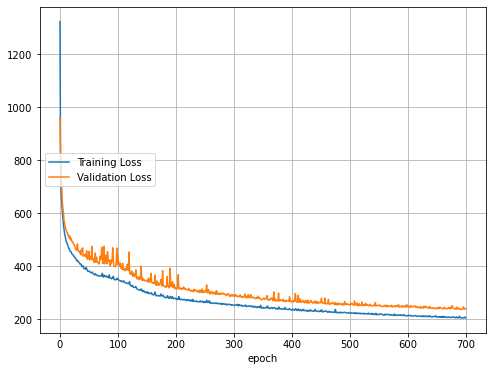

Epoch 702/2000:  train Loss: 206.4877   val Loss: 239.8684   time: 3.50s   best: 237.6857
Epoch 703/2000:  train Loss: 205.3320   val Loss: 240.2873   time: 3.27s   best: 237.6857
Epoch 704/2000:  train Loss: 205.7826   val Loss: 240.8168   time: 3.14s   best: 237.6857
Epoch 705/2000:  train Loss: 205.1162   val Loss: 241.1606   time: 3.09s   best: 237.6857
Epoch 706/2000:  train Loss: 205.5649   val Loss: 243.6686   time: 3.09s   best: 237.6857
Epoch 707/2000:  train Loss: 205.3109   val Loss: 241.5465   time: 3.09s   best: 237.6857
Epoch 708/2000:  train Loss: 204.9189   val Loss: 243.1508   time: 3.08s   best: 237.6857
Epoch 709/2000:  train Loss: 206.2033   val Loss: 244.0567   time: 3.08s   best: 237.6857
Epoch 710/2000:  train Loss: 207.1408   val Loss: 238.4221   time: 3.10s   best: 237.6857
Epoch 711/2000:  train Loss: 204.7552   val Loss: 240.0174   time: 3.18s   best: 237.6857
Epoch 712/2000:  train Loss: 205.8629   val Loss: 240.5613   time: 3.10s   best: 237.6857
Epoch 713/

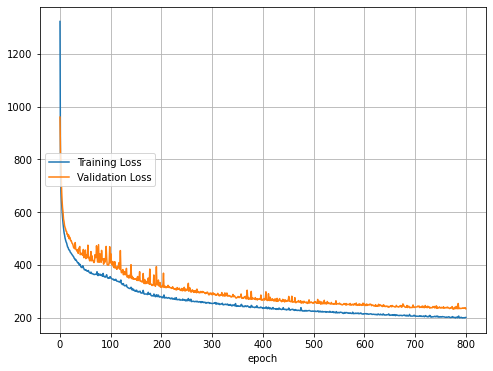

Epoch 802/2000:  train Loss: 199.3607   val Loss: 237.5363   time: 3.08s   best: 232.4506
Epoch 803/2000:  train Loss: 199.9283   val Loss: 237.8902   time: 3.13s   best: 232.4506
Epoch 804/2000:  train Loss: 200.7880   val Loss: 232.1295   time: 3.19s   best: 232.1295
Epoch 805/2000:  train Loss: 198.9066   val Loss: 233.5173   time: 3.11s   best: 232.1295
Epoch 806/2000:  train Loss: 199.0945   val Loss: 236.8535   time: 3.10s   best: 232.1295
Epoch 807/2000:  train Loss: 199.7051   val Loss: 234.7507   time: 3.10s   best: 232.1295
Epoch 808/2000:  train Loss: 199.7379   val Loss: 236.3577   time: 3.09s   best: 232.1295
Epoch 809/2000:  train Loss: 200.0888   val Loss: 234.9952   time: 3.09s   best: 232.1295
Epoch 810/2000:  train Loss: 201.0181   val Loss: 238.3973   time: 3.09s   best: 232.1295
Epoch 811/2000:  train Loss: 199.4470   val Loss: 237.0900   time: 3.16s   best: 232.1295
Epoch 812/2000:  train Loss: 201.5283   val Loss: 233.9197   time: 3.17s   best: 232.1295
Epoch 813/

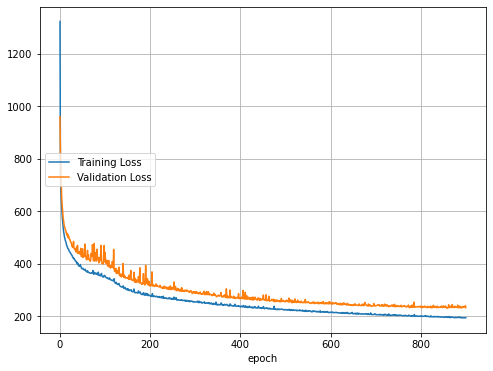

Epoch 902/2000:  train Loss: 193.6421   val Loss: 236.8644   time: 3.26s   best: 230.0701
Epoch 903/2000:  train Loss: 193.5898   val Loss: 236.3511   time: 3.36s   best: 230.0701
Epoch 904/2000:  train Loss: 195.8221   val Loss: 239.1333   time: 3.25s   best: 230.0701
Epoch 905/2000:  train Loss: 193.9919   val Loss: 232.9549   time: 3.23s   best: 230.0701
Epoch 906/2000:  train Loss: 192.0866   val Loss: 231.5094   time: 3.24s   best: 230.0701
Epoch 907/2000:  train Loss: 194.9228   val Loss: 254.6804   time: 3.23s   best: 230.0701
Epoch 908/2000:  train Loss: 198.8100   val Loss: 230.8104   time: 3.21s   best: 230.0701
Epoch 909/2000:  train Loss: 194.2108   val Loss: 231.1642   time: 3.13s   best: 230.0701
Epoch 910/2000:  train Loss: 192.7058   val Loss: 230.5865   time: 3.18s   best: 230.0701
Epoch 911/2000:  train Loss: 193.3360   val Loss: 233.2492   time: 3.16s   best: 230.0701
Epoch 912/2000:  train Loss: 194.5111   val Loss: 232.2090   time: 3.10s   best: 230.0701
Epoch 913/

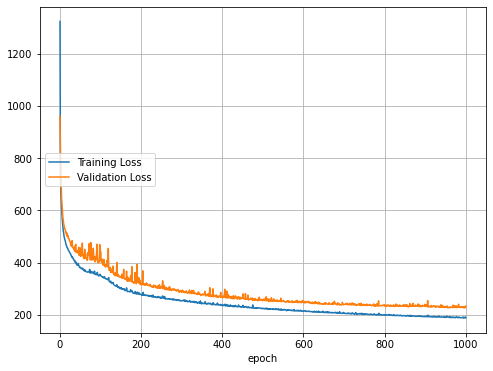

Epoch 1002/2000:  train Loss: 188.8339   val Loss: 228.1713   time: 3.13s   best: 226.8157
Epoch 1003/2000:  train Loss: 188.1209   val Loss: 228.5102   time: 3.19s   best: 226.8157
Epoch 1004/2000:  train Loss: 187.9310   val Loss: 230.4148   time: 3.12s   best: 226.8157
Epoch 1005/2000:  train Loss: 190.2127   val Loss: 228.4908   time: 3.10s   best: 226.8157
Epoch 1006/2000:  train Loss: 187.3478   val Loss: 228.7960   time: 3.10s   best: 226.8157
Epoch 1007/2000:  train Loss: 188.2470   val Loss: 228.1559   time: 3.09s   best: 226.8157
Epoch 1008/2000:  train Loss: 188.6282   val Loss: 228.4323   time: 3.09s   best: 226.8157
Epoch 1009/2000:  train Loss: 192.1170   val Loss: 253.3458   time: 3.09s   best: 226.8157
Epoch 1010/2000:  train Loss: 195.1195   val Loss: 228.4222   time: 3.16s   best: 226.8157
Epoch 1011/2000:  train Loss: 189.1401   val Loss: 230.6177   time: 3.17s   best: 226.8157
Epoch 1012/2000:  train Loss: 189.7037   val Loss: 228.3075   time: 3.10s   best: 226.8157

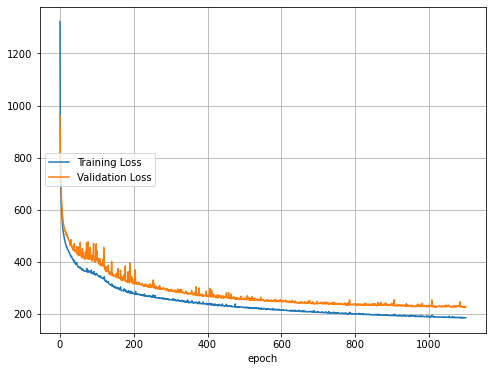

Epoch 1102/2000:  train Loss: 183.9789   val Loss: 224.4765   time: 3.11s   best: 224.4765
Epoch 1103/2000:  train Loss: 183.9804   val Loss: 228.0874   time: 3.19s   best: 224.4765
Epoch 1104/2000:  train Loss: 183.7225   val Loss: 226.1166   time: 3.12s   best: 224.4765
Epoch 1105/2000:  train Loss: 183.5525   val Loss: 224.7064   time: 3.10s   best: 224.4765
Epoch 1106/2000:  train Loss: 184.6287   val Loss: 226.3755   time: 3.10s   best: 224.4765
Epoch 1107/2000:  train Loss: 185.4403   val Loss: 225.6501   time: 3.10s   best: 224.4765
Epoch 1108/2000:  train Loss: 185.3231   val Loss: 225.5843   time: 3.09s   best: 224.4765
Epoch 1109/2000:  train Loss: 185.0094   val Loss: 226.2858   time: 3.09s   best: 224.4765
Epoch 1110/2000:  train Loss: 184.7429   val Loss: 227.3894   time: 3.13s   best: 224.4765
Epoch 1111/2000:  train Loss: 186.2879   val Loss: 225.0967   time: 3.19s   best: 224.4765
Epoch 1112/2000:  train Loss: 185.6321   val Loss: 226.8058   time: 3.11s   best: 224.4765

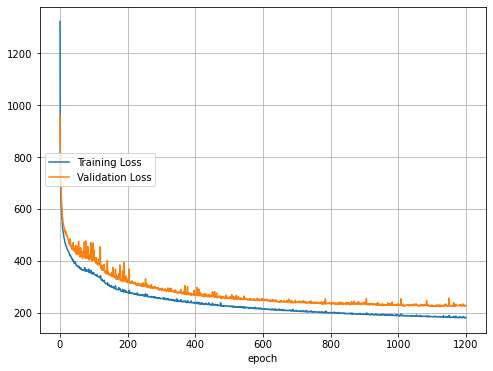

Epoch 1202/2000:  train Loss: 180.2677   val Loss: 226.4863   time: 3.09s   best: 223.3998
Epoch 1203/2000:  train Loss: 180.6514   val Loss: 226.0378   time: 3.18s   best: 223.3998
Epoch 1204/2000:  train Loss: 182.2525   val Loss: 224.5454   time: 3.15s   best: 223.3998
Epoch 1205/2000:  train Loss: 182.1820   val Loss: 225.1491   time: 3.11s   best: 223.3998
Epoch 1206/2000:  train Loss: 180.7218   val Loss: 227.0105   time: 3.11s   best: 223.3998
Epoch 1207/2000:  train Loss: 180.0312   val Loss: 225.4259   time: 3.10s   best: 223.3998
Epoch 1208/2000:  train Loss: 179.7488   val Loss: 225.7983   time: 3.09s   best: 223.3998
Epoch 1209/2000:  train Loss: 180.5011   val Loss: 224.7163   time: 3.09s   best: 223.3998
Epoch 1210/2000:  train Loss: 181.7279   val Loss: 226.0996   time: 3.10s   best: 223.3998
Epoch 1211/2000:  train Loss: 181.3453   val Loss: 224.5509   time: 3.19s   best: 223.3998
Epoch 1212/2000:  train Loss: 179.8276   val Loss: 224.3263   time: 3.14s   best: 223.3998

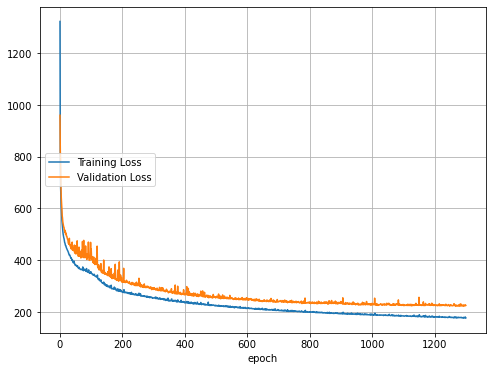

Epoch 1302/2000:  train Loss: 176.3216   val Loss: 224.7890   time: 3.09s   best: 222.4015
Epoch 1303/2000:  train Loss: 178.7154   val Loss: 226.6385   time: 3.10s   best: 222.4015
Epoch 1304/2000:  train Loss: 177.2946   val Loss: 225.3674   time: 3.19s   best: 222.4015
Epoch 1305/2000:  train Loss: 177.0303   val Loss: 226.4538   time: 3.13s   best: 222.4015
Epoch 1306/2000:  train Loss: 176.9118   val Loss: 224.9510   time: 3.10s   best: 222.4015
Epoch 1307/2000:  train Loss: 177.7157   val Loss: 227.3140   time: 3.10s   best: 222.4015
Epoch 1308/2000:  train Loss: 176.9642   val Loss: 225.5166   time: 3.10s   best: 222.4015
Epoch 1309/2000:  train Loss: 179.1232   val Loss: 226.5198   time: 3.10s   best: 222.4015
Epoch 1310/2000:  train Loss: 176.1027   val Loss: 226.0912   time: 3.09s   best: 222.4015
Epoch 1311/2000:  train Loss: 175.5865   val Loss: 227.1361   time: 3.13s   best: 222.4015
Epoch 1312/2000:  train Loss: 176.5518   val Loss: 224.8416   time: 3.20s   best: 222.4015

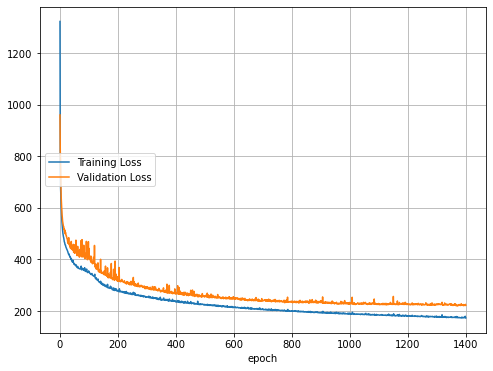

Epoch 1402/2000:  train Loss: 173.6524   val Loss: 227.9256   time: 3.17s   best: 219.6011
Epoch 1403/2000:  train Loss: 173.7301   val Loss: 222.9147   time: 3.17s   best: 219.6011
Epoch 1404/2000:  train Loss: 173.7488   val Loss: 223.0249   time: 3.11s   best: 219.6011
Epoch 1405/2000:  train Loss: 173.2120   val Loss: 223.3824   time: 3.11s   best: 219.6011
Epoch 1406/2000:  train Loss: 173.4334   val Loss: 222.6591   time: 3.11s   best: 219.6011
Epoch 1407/2000:  train Loss: 173.8531   val Loss: 221.7688   time: 3.10s   best: 219.6011
Epoch 1408/2000:  train Loss: 175.9709   val Loss: 223.9698   time: 3.08s   best: 219.6011
Epoch 1409/2000:  train Loss: 173.6885   val Loss: 224.5595   time: 3.09s   best: 219.6011
Epoch 1410/2000:  train Loss: 173.1053   val Loss: 223.1198   time: 3.20s   best: 219.6011
Epoch 1411/2000:  train Loss: 174.7499   val Loss: 223.2725   time: 3.13s   best: 219.6011
Epoch 1412/2000:  train Loss: 174.2447   val Loss: 224.6315   time: 3.10s   best: 219.6011

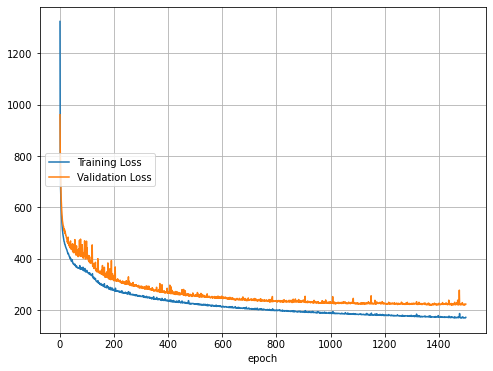

Epoch 1502/2000:  train Loss: 170.2837   val Loss: 221.7290   time: 3.18s   best: 219.6011
Epoch 1503/2000:  train Loss: 170.9165   val Loss: 223.1100   time: 3.10s   best: 219.6011
Epoch 1504/2000:  train Loss: 170.8932   val Loss: 222.7907   time: 3.10s   best: 219.6011
Epoch 1505/2000:  train Loss: 171.0796   val Loss: 223.3777   time: 3.09s   best: 219.6011
Epoch 1506/2000:  train Loss: 170.6764   val Loss: 223.5593   time: 3.09s   best: 219.6011
Epoch 1507/2000:  train Loss: 169.7430   val Loss: 220.8465   time: 3.14s   best: 219.6011
Epoch 1508/2000:  train Loss: 171.2604   val Loss: 221.4963   time: 3.18s   best: 219.6011
Epoch 1509/2000:  train Loss: 169.8767   val Loss: 222.8414   time: 3.10s   best: 219.6011
Epoch 1510/2000:  train Loss: 172.3995   val Loss: 220.9779   time: 3.10s   best: 219.6011
Epoch 1511/2000:  train Loss: 173.7403   val Loss: 225.2739   time: 3.10s   best: 219.6011
Epoch 1512/2000:  train Loss: 170.3439   val Loss: 221.5181   time: 3.09s   best: 219.6011

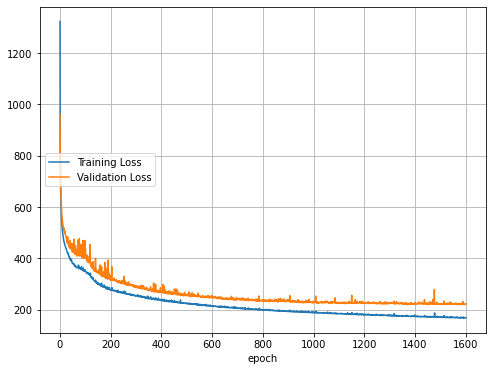

Epoch 1602/2000:  train Loss: 168.4804   val Loss: 220.9861   time: 3.11s   best: 219.4391
Epoch 1603/2000:  train Loss: 170.0358   val Loss: 224.7449   time: 3.11s   best: 219.4391
Epoch 1604/2000:  train Loss: 168.7569   val Loss: 223.3811   time: 3.11s   best: 219.4391
Epoch 1605/2000:  train Loss: 167.8928   val Loss: 221.9626   time: 3.10s   best: 219.4391
Epoch 1606/2000:  train Loss: 168.5261   val Loss: 221.9713   time: 3.14s   best: 219.4391
Epoch 1607/2000:  train Loss: 168.9102   val Loss: 219.8018   time: 3.20s   best: 219.4391
Epoch 1608/2000:  train Loss: 168.1835   val Loss: 223.2194   time: 3.13s   best: 219.4391
Epoch 1609/2000:  train Loss: 168.5036   val Loss: 221.1259   time: 3.11s   best: 219.4391
Epoch 1610/2000:  train Loss: 168.4469   val Loss: 220.3128   time: 3.11s   best: 219.4391
Epoch 1611/2000:  train Loss: 168.7878   val Loss: 221.9288   time: 3.11s   best: 219.4391
Epoch 1612/2000:  train Loss: 169.2542   val Loss: 224.5317   time: 3.10s   best: 219.4391

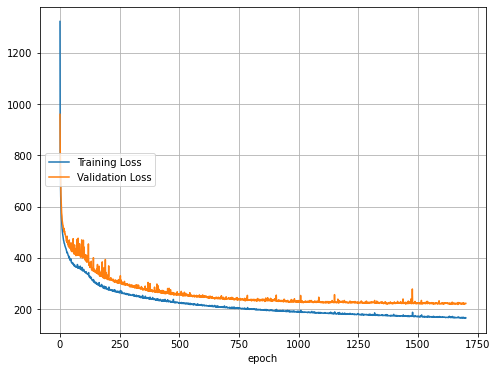

Epoch 1702/2000:  train Loss: 165.3361   val Loss: 222.1442   time: 3.11s   best: 218.0051
Epoch 1703/2000:  train Loss: 166.8502   val Loss: 219.4380   time: 3.10s   best: 218.0051
Epoch 1704/2000:  train Loss: 165.0505   val Loss: 221.1316   time: 3.10s   best: 218.0051
Epoch 1705/2000:  train Loss: 165.1874   val Loss: 219.8081   time: 3.18s   best: 218.0051
Epoch 1706/2000:  train Loss: 165.7891   val Loss: 222.4770   time: 3.16s   best: 218.0051
Epoch 1707/2000:  train Loss: 165.4094   val Loss: 221.3742   time: 3.11s   best: 218.0051
Epoch 1708/2000:  train Loss: 165.6347   val Loss: 221.1254   time: 3.17s   best: 218.0051
Epoch 1709/2000:  train Loss: 165.1174   val Loss: 222.9232   time: 3.23s   best: 218.0051
Epoch 1710/2000:  train Loss: 165.6515   val Loss: 227.5419   time: 3.22s   best: 218.0051
Epoch 1711/2000:  train Loss: 166.4317   val Loss: 222.8489   time: 3.22s   best: 218.0051
Epoch 1712/2000:  train Loss: 165.8541   val Loss: 222.1343   time: 3.24s   best: 218.0051

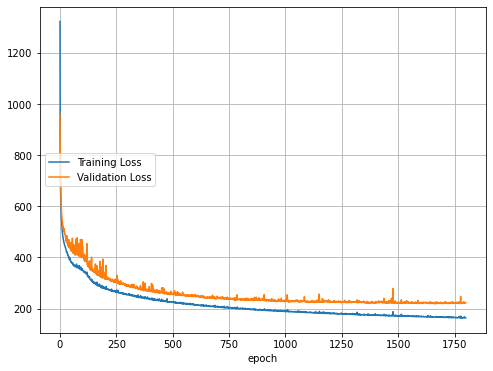

Epoch 1802/2000:  train Loss: 162.8265   val Loss: 222.9594   time: 3.10s   best: 218.0051
Epoch 1803/2000:  train Loss: 163.5876   val Loss: 221.0533   time: 3.10s   best: 218.0051
Epoch 1804/2000:  train Loss: 163.2316   val Loss: 220.3367   time: 3.09s   best: 218.0051
Epoch 1805/2000:  train Loss: 163.7925   val Loss: 222.0081   time: 3.09s   best: 218.0051
Epoch 1806/2000:  train Loss: 164.6912   val Loss: 220.0632   time: 3.09s   best: 218.0051
Epoch 1807/2000:  train Loss: 162.7363   val Loss: 221.0953   time: 3.15s   best: 218.0051
Epoch 1808/2000:  train Loss: 164.3318   val Loss: 221.0665   time: 3.17s   best: 218.0051
Epoch 1809/2000:  train Loss: 165.1078   val Loss: 222.2804   time: 3.10s   best: 218.0051
Epoch 1810/2000:  train Loss: 163.6293   val Loss: 219.9637   time: 3.10s   best: 218.0051
Epoch 1811/2000:  train Loss: 162.7008   val Loss: 222.0961   time: 3.10s   best: 218.0051
Epoch 1812/2000:  train Loss: 162.7756   val Loss: 222.8580   time: 3.09s   best: 218.0051

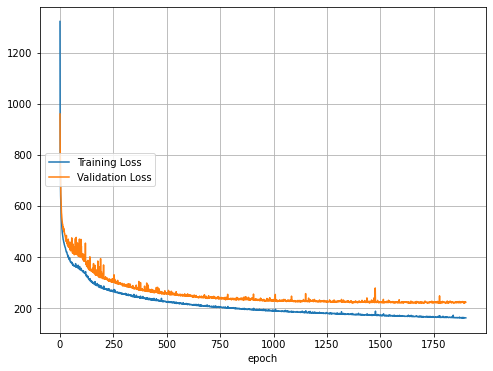

Epoch 1902/2000:  train Loss: 161.6493   val Loss: 222.2278   time: 3.09s   best: 218.0051
Epoch 1903/2000:  train Loss: 161.3975   val Loss: 223.9832   time: 3.08s   best: 218.0051
Epoch 1904/2000:  train Loss: 160.8046   val Loss: 221.4273   time: 3.11s   best: 218.0051
Epoch 1905/2000:  train Loss: 161.1054   val Loss: 221.6856   time: 3.18s   best: 218.0051
Epoch 1906/2000:  train Loss: 161.6351   val Loss: 225.5769   time: 3.12s   best: 218.0051
Epoch 1907/2000:  train Loss: 161.7411   val Loss: 223.3231   time: 3.10s   best: 218.0051
Epoch 1908/2000:  train Loss: 161.9535   val Loss: 223.3342   time: 3.10s   best: 218.0051
Epoch 1909/2000:  train Loss: 164.5631   val Loss: 223.1059   time: 3.10s   best: 218.0051
Epoch 1910/2000:  train Loss: 160.8021   val Loss: 222.8915   time: 3.09s   best: 218.0051
Epoch 1911/2000:  train Loss: 161.0787   val Loss: 222.0775   time: 3.09s   best: 218.0051
Epoch 1912/2000:  train Loss: 161.4589   val Loss: 222.7464   time: 3.14s   best: 218.0051

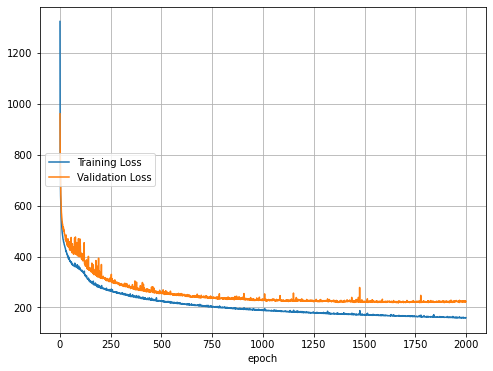

Training complete in 104m 55s   best validation loss: 218.0051


In [7]:
bl_dict={'train':train_bl, 'val':val_bl}
log_file = 'log_test1.txt'

losses, best_model = train_model(model, criterion, optimizer , max_lr=0.001, dataloader=bl_dict,
                                 num_epochs=2000, logFile=log_file, log_every=500)

### Save model

In [8]:
torch.save(model.state_dict(), 'Models/full_1000_0.001_106_13M115_dropout_fused_kBest_0.001_2000_ALL+New_0.2.pkl')

### Load existing model

In [15]:
# model.load_state_dict(torch.load('Models/full_1000_0.001_106_13M115_dropout_fused_kBest_0.0006_2000_4.pkl',map_location=train_device))
model.load_state_dict(torch.load('Models/full_1000_0.001_106_13M115_dropout_fused_kBest_0.001_2000_ALL+New_0.2.pkl',map_location=train_device))
model.to(train_device)
print()

### Results 

In [8]:
#accuracy 1st-shot, 2-shots, 3-shots and 5-shots
def accuracy(df):
    #return np.sum(df["prediction"] == df["target"]) / len(df) * 100
    targets = np.array(df['target'].values.tolist()) # 1-dim array (#rows, ) = list
    #we went to lists and back to get the last dimension of the (#rows, #size_output) instead of (#rows,)
    predictions = np.array(df['prediction'].values.tolist())
    
    first = np.argmax(targets[:,0:106],-1) == np.argmax(predictions[:,0:106],-1) 
    second = np.argmax(targets[:,0:106],-1) ==  np.argmax(predictions[:,106:106+106],-1)
    third = np.argmax(targets[:,0:106],-1) ==  np.argmax(predictions[:,106*2:106*3],-1)
    forth = np.argmax(targets[:,0:106],-1) ==  np.argmax(predictions[:,106*3:106*4],-1 )  
    fifth = np.argmax(targets[:,0:106],-1) ==  np.argmax(predictions[:,106*4:106*5],-1)
    firstorsecond = np.logical_or(first,second)
    firstorsecondorsthird = firstorsecond | third # same as logical or
    anywhere = firstorsecondorsthird | forth | fifth
    return np.sum(first == True) / len(df) * 100, np.sum(firstorsecond == True) / len(df) * 100, np.sum(firstorsecondorsthird == True) / len(df) * 100, np.sum(anywhere == True) / len(df) * 100

In [20]:
#get results of the model on the datasets previously loaded
val_df = get_results_df(train_val_dataset, val_bl, val_indices, model)
test_df = get_results_df(test_dataset, test_bl, test_indices, model)
train_df = get_results_df(train_val_dataset, train_bl, train_indices, model)

100%|██████████| 22/22 [00:00<00:00, 370.12it/s]


In [21]:
#print the accuracies of the model on each dataset.
print( "train", accuracy(train_df), "val", accuracy(val_df), "test", accuracy(test_df) )

test (80.34743309088341, 94.64727067297507, 96.84344325965681, 97.88150554339383)


In [16]:
%run utils_k-best.py

#single computations 'real' benchmark
benchmark_dataset_file = '/data/mm12191/datasets/benchmarks_ds2.json'
bench_ds, bench_bl, bench_indices, _, _ = load_merge_data(None, benchmark_dataset_file, 1, filter_func_MC=filter_schedule_MC, filter_func_SC=filter_schedule_SC)
bench_df = get_results_df(bench_ds, bench_bl, bench_indices, model)

#long programs synthetic test set.
# benchmark_dataset_file = '/data/mm12191/datasets/dataset_batch190201-190710.pkl'
# bench_ds, bench_bl, bench_indices, _, _ = load_merge_data(benchmark_dataset_file, None, 1, filter_func_MC=filter_schedule_MC, filter_func_SC=filter_schedule_SC)
# bench_df = get_results_df(bench_ds, bench_bl, bench_indices, model)

100%|██████████| 30/30 [00:00<00:00, 354.46it/s]

Number of batches 3
Data loaded
Sizes: (3, 0) batches


In [18]:
bench_df

,name,exec_time,prediction,target
0,function_heat2d_LARGE,3.128110,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,function_heat2d_MEDIUM,0.096483,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,function_heat2d_MINI,0.001186,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,function_heat2d_SMALL,0.010014,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,function_heat2d_XLARGE,20.381001,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,function_jacobi1d_LARGE,5.728760,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,function_jacobi1d_MEDIUM,0.407311,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,function_jacobi1d_MINI,0.004030,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,function_jacobi1d_SMALL,0.040832,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,function_jacobi1d_XLARGE,23.048100,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [19]:
#Accuracy on the chosen benchmark (1st shot, 2-shots, 3-shots and 5-shots (any shot))
accuracy(bench_df) 

(80.0, 86.66666666666667, 90.0, 90.0)